# Takagi-Sugeno-Kang Inference with HotFIS

> This notebook demonstrates a use case where a fuzzy inference system (FIS) is created using HotFIS to address the tipping example often used to illustrate fuzzy logic. Zeroth order Takagi-Sugeno-Kang inference is employed with rules having multiple antecedents.

---

## Table of Contents

* [Setup](#c0)
* [FIS Creation](#c1)

---

## Setup  <a name="c0"></a>

In [28]:
import hotfis as hf

import numpy as np
import matplotlib.pyplot as plt

from itertools import product

---

## FIS Creation  <a name="c1"></a>

##### Create Membership Function Groupset

In [4]:
# Define membership function groupset
groupset = hf.FuzzyGroupset([
    # Input group 1
    hf.FuzzyGroup("service", 0, 10, [
        hf.FuzzyFunc("poor", [3, 5], "leftedge"),
        hf.FuzzyFunc("good", [3, 5, 7], "triangular"),
        hf.FuzzyFunc("excellent", [5, 7], "rightedge")
    ]),

    # Input group 2
    hf.FuzzyGroup("food", 0, 10, [
        hf.FuzzyFunc("rancid", [4, 6], "leftedge"),
        hf.FuzzyFunc("delicious", [4, 6], "rightedge")
    ]),

    # Output group with zeroth order TSK outputs as parameters
    hf.FuzzyGroup("tip", 0, 30, [
        hf.FuzzyFunc("cheap", [7], "tsk"),
        hf.FuzzyFunc("average", [17], "tsk"),
        hf.FuzzyFunc("generous", [26], "tsk")
    ]),
])

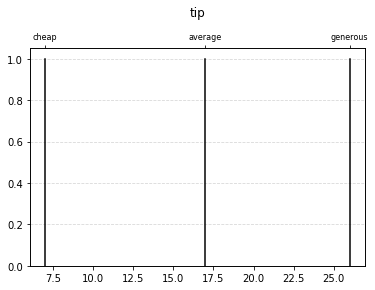

In [5]:
# A group may be plotted with the 'plot' method
groupset["tip"].plot()
plt.show()

##### Create Fuzzy Ruleset

> The other element of a FIS is the ruleset. FuzzyRulesets may be defined with strings representing the rules. The groups and function names of the groupset must be used. Multiple antecedents connected with 'and' and 'or' are supported.

In [6]:
ruleset = hf.FuzzyRuleset([
    "if service is poor or food is rancid then tip is cheap",
    "if service is good then tip is average",
    "if service is excellent or food is delicious then tip is generous",
])

##### Creating the FIS

In [7]:
# Create the fuzzy inference system
fis = hf.FIS(groupset, ruleset)

---

## Approximation of Mamdani

In [9]:
approx_fis = fis.approximate_mamdani()

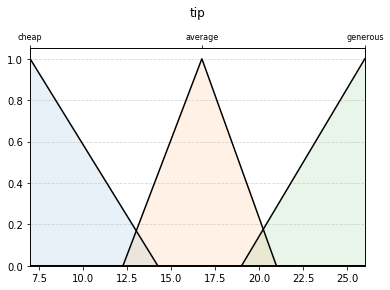

In [15]:
approx_fis.groupset["tip"].plot()
plt.show()

## Results Comparison

In [64]:
# Save input values
foods = np.linspace(0, 10, 101)
services = foods.copy()

# Get all combinations of inputs
combos = np.array(list(product(foods, services)))
inputs = {"food": combos[:, 0], "service": combos[:, 1]}

tips_tsk = fis.eval_tsk(inputs)["tip"].reshape(101, 101)

tips_mam = approx_fis.eval_mamdani(inputs)["tip"]
tips_mam[0].shape


#np.meshgrid(foods, services)[0]

(10201, 100)